In [1]:
% pylab inline
import os
import random

import pandas as pd
from scipy.misc import imread

Populating the interactive namespace from numpy and matplotlib


In [14]:
import os
_src = "Train/"
_ext = ".jpg"
for i,filename in enumerate(os.listdir(_src)):
    if filename.endswith(_ext):
        os.rename(filename, _src+'People-' + str(i).zfill(3)+_ext)

FileNotFoundError: [Errno 2] No such file or directory: '20900.jpg' -> 'Train/People-000.jpg'

In [2]:
root_dir = os.path.abspath('.')

In [3]:
train=pd.read_csv(os.path.join(root_dir,'train.csv'))
test=pd.read_csv(os.path.join(root_dir,'test.csv'))

In [4]:
i = random.choice(train.index)
img_name = train.ID[i]
img = imread(os.path.join(root_dir, 'Train', img_name),flatten=True)

print('Age:', train.Class[i])

Age: OLD


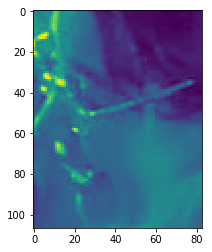

In [5]:
imshow(img)

In [6]:
from scipy.misc import imresize

temp = []
for img_name in train.ID:
    img_path = os.path.join(root_dir, 'Train', img_name)
    img = imread(img_path)
    img = imresize(img, (64, 64, 1))
    img = img.astype('float32') 
    temp.append(img)

train_x = np.stack(temp)

In [7]:
train_x.shape

(19906, 64, 64, 3)

In [8]:
temp = []
for img_name in test.ID:
    img_path = os.path.join(root_dir, 'Test', img_name)
    img = imread(img_path)
    img = imresize(img, (64, 64, 1))
    temp.append(img.astype('float32'))

test_x = np.stack(temp)

In [9]:
train_x = train_x / 255.
test_x = test_x / 255.

In [10]:
test_x

array([[[[ 0.09803922,  0.07843138,  0.0627451 ],
         [ 0.09803922,  0.07843138,  0.0627451 ],
         [ 0.10196079,  0.08235294,  0.06666667],
         ..., 
         [ 0.10980392,  0.10588235,  0.09019608],
         [ 0.10588235,  0.10196079,  0.09411765],
         [ 0.10196079,  0.10196079,  0.09411765]],

        [[ 0.10980392,  0.09019608,  0.07450981],
         [ 0.10588235,  0.09019608,  0.07058824],
         [ 0.10196079,  0.09019608,  0.07058824],
         ..., 
         [ 0.10588235,  0.10196079,  0.08627451],
         [ 0.10980392,  0.10588235,  0.09411765],
         [ 0.10980392,  0.10980392,  0.10196079]],

        [[ 0.11764706,  0.10196079,  0.08235294],
         [ 0.10980392,  0.09803922,  0.07843138],
         [ 0.09803922,  0.09019608,  0.07058824],
         ..., 
         [ 0.10196079,  0.09803922,  0.08235294],
         [ 0.10980392,  0.10980392,  0.09803922],
         [ 0.11372549,  0.11372549,  0.10588235]],

        ..., 
        [[ 0.58431375,  0.45490196,

In [11]:
train.Class.value_counts()

MIDDLE    10804
YOUNG      6706
OLD        2396
Name: Class, dtype: int64

In [12]:
import keras
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.13.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [13]:
train_y.shape

(19906,)

In [14]:
train_y = keras.utils.np_utils.to_categorical(train_y)

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [18]:
classifier = Sequential()

classifier.add(Conv2D(50, (5, 5), input_shape = (64, 64,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


classifier.add(Conv2D(100, (5, 5), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(100, (5, 5), activation = 'relu'))

classifier.add(Flatten())


classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 3, activation = 'sigmoid'))


classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs = 20
batch_size = 512

classifier.fit(
                train_x, train_y, 
                nb_epoch=epochs, 
                batch_size=batch_size
            )

/usr/local/lib/python3.5/dist-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
19906/19906 [==============================] - 804s 40ms/step - loss: 0.8199 - acc: 0.5428
Epoch 2/20
 1024/19906 [>.............................] - ETA: 9:08 - loss: 0.7377 - acc: 0.5703

In [ ]:
pred = classifier.predict_classes(test_x)

In [ ]:
test['Class']=1

In [ ]:
for i in test.index:
    test['Class'][i]=lb.inverse_transform(pred[i])

In [ ]:
test = test.reindex_axis(sorted(test.columns), axis=1)
test.to_csv('two1.csv')